# Introduction

The primary objectives of this notebook will be:

i.  Perform exploratory data analysis (EDA) on the breast cancer dataset.

ii.  Build and train an isolation forest model to detect abnormal data points in the dataset. 

iii.  Examine various feature elimination methods and establish how they affect the performance of the isolation forest model. 

iv.  Conclusion 


In [312]:
# %pip install pandas numpy matplotlib seaborn scikit-learn

In [313]:
# %pip install imbalanced-learn

In [314]:
# %pip install pandas

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
#from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, average_precision_score
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [316]:
df=pd.read_csv('breast-cancer.csv')

In [317]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [318]:
#encode the categorical data
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

#drop the id column
df=df.drop(['id'],axis=1)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [319]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [320]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [321]:
# n_rows = 200
# n_cols = 10

# # Creatbe an empty DataFrame with specified columns
# df = pd.DataFrame(columns=[f'Column{i+1}' for i in range(n_cols)])

# # Initialize the first row with random values
# df.loc[0] = np.random.rand(n_cols) * 100  # Random values between 0 and 100 for the first row

# # Populate the DataFrame with rows that are similar to the previous rows
# for i in range(1, n_rows):
#     # Current row is previous row plus some small random noise
#     df.loc[i] = df.loc[i-1] + np.random.normal(0, 1, n_cols)  # Adjust mean and std dev for your needs

In [322]:
new_df = df.copy()

In [323]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [324]:
# # assume that df is the DataFrame of features and diagnosis is the Series of class labels

# # compare each feature with the diagnosis using histograms
# import math

# n_cols = 3
# n_rows = math.ceil(len(df.columns.values[:-1]) / n_cols)

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(20,30))

# for idx, feat in enumerate(df.columns.values[:-1]):
#     sns.histplot(data=df, x=feat, hue='diagnosis', ax=axes[idx//n_cols, idx%n_cols], kde=True)
#     axes[idx//n_cols, idx%n_cols].set_title(feat, fontsize=12)
#     axes[idx//n_cols, idx%n_cols].set_xticklabels(axes[idx//n_cols, idx%n_cols].get_xticklabels(), rotation=45, fontsize=10)

# # add padding between subplots
# fig.subplots_adjust(hspace=0.8, wspace=0.5)

# plt.show()

In [325]:
# #use boxplots to show the distrubution of each feature

# fig, axes = plt.subplots(10, 3, figsize=(20, 30))

# for idx, feat in enumerate(df.columns.values[:-1]):
#     sns.boxplot(data=df, x='diagnosis', y=feat, ax=axes[idx//3, idx%3])
#     axes[idx//3, idx%3].set_title(feat, fontsize=12)
#     axes[idx//3, idx%3].set_xticklabels(axes[idx//3, idx%3].get_xticklabels(), rotation=45, fontsize=10)

# # add padding between subplots
# fig.subplots_adjust(hspace=0.8, wspace=0.5)

# plt.show()

In [326]:
#separate the training and testing data

y=df['diagnosis']
X=df.drop(['diagnosis'],axis=1)

In [327]:
#split the data into test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=1234,shuffle=True)

In [328]:
#train an isolation forest model

clf=IsolationForest(random_state=1234, n_estimators=100, max_samples='auto', bootstrap=True, n_jobs=-1, verbose=0,max_features=0.25)

In [329]:
#fit isolation forest
clf.fit(X_train)

IsolationForest(bootstrap=True, max_features=0.25, n_jobs=-1, random_state=1234)

In [330]:
#predict the training data on isolation forest
y_pred_train=clf.predict(X_test)

In [331]:
#print the unique values of the predictions by isolation forest
print(f'Isolation Forest: {np.unique(y_pred_train, return_counts=True)}')

Isolation Forest: (array([-1,  1]), array([ 31, 157]))


In [332]:
#map predictions to -1 and 1 for isolation forest
y_pred_train[y_pred_train==1]=0
y_pred_train[y_pred_train==-1]=1

#print the unique values of the predictions by isolation forest
print(f'Isolation Forest: {np.unique(y_pred_train, return_counts=True)}')

Isolation Forest: (array([0, 1]), array([157,  31]))


In [333]:

from sklearn.metrics import classification_report
#print classification report for isolation forest
print("Isolation Forest classification Report:\n\n")
print(classification_report(y_test,y_pred_train))

Isolation Forest classification Report:


              precision    recall  f1-score   support

           0       0.66      0.89      0.76       117
           1       0.58      0.25      0.35        71

    accuracy                           0.65       188
   macro avg       0.62      0.57      0.56       188
weighted avg       0.63      0.65      0.61       188



### feature scalling and standardization

In [334]:
#model performance with scaled data
scaler=StandardScaler()
scaler.fit(X)

X_scaled=scaler.transform(X)

#split the data into test and train
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.20,random_state=1234)

In [311]:
#train an isolation forest model
model=IsolationForest(random_state=1234, n_estimators=100,max_samples='auto', n_jobs=-1, max_features=0.25, bootstrap=True, verbose=0)
model.fit(X_train)


#predict the labels for isolation forest
y_pred_train=model.predict(X_test)

#map the predictions -1 to 1 and 1 to 0
y_pred_train[y_pred_train==1]=0
y_pred_train[y_pred_train==-1]=1

#print new labels after mapping
print(f'New labels after mapping: {np.unique(y_pred_train)}')

#print classification report
print("Isolation Forest classification Report:\n\n")
print(classification_report(y_test,y_pred_train,labels=['normal','anomaly']))



New labels after mapping: [0 1]
Isolation Forest classification Report:


              precision    recall  f1-score   support

      normal       0.00      0.00      0.00         0
     anomaly       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0



### Feature elimination using decision tree

In [300]:
# #eliminate features using decision tree
# clf=DecisionTreeClassifier()
# clf=clf.fit(X,y)

# #plot the feature importance
# plt.figure(figsize=(8,4))
# plt.barh(X.columns,clf.feature_importances_)
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature')
# plt.show()


In [284]:
# #store the important featues in a dataframe
# feature_imp=pd.DataFrame({'feature':X.columns,'importance':clf.feature_importances_})
# feature_imp.sort_values(by='importance',ascending=False)

# #eliminate features with importance less than 0.1
# model=SelectFromModel(clf,threshold=0.2,prefit=True)
# X_new=model.transform(X)

# #split the data into test and train
# X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=42)

# #train an isolation forest model
# model=IsolationForest(random_state=1234, n_estimators=100,max_samples=0.25, n_jobs=-1,bootstrap=False, verbose=0,max_features=0.75,warm_start=False)

# model.fit(X_train)

# #predict the labels
# y_pred_train=model.predict(X_test)

# #map the predictions -1 to 1 and 1 to 0

# y_pred_train[y_pred_train==1]=0
# y_pred_train[y_pred_train==-1]=1

# #print new labels after mapping
# print(f'New labels after mapping: {np.unique(y_pred_train)}')

# #print classification report
# print(classification_report(y_test,y_pred_train))


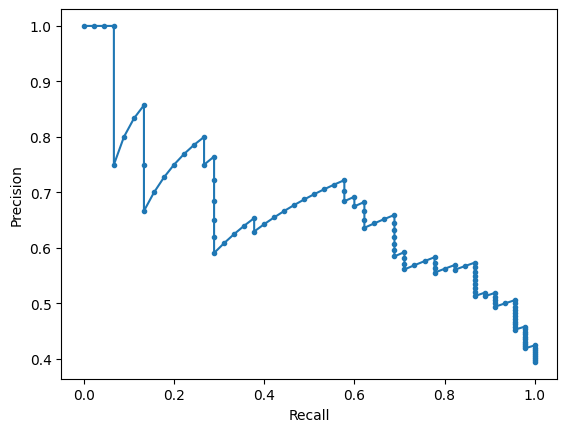

In [304]:
#plot a precision recall curve
scores=model.decision_function(X_test)
inverted_scores=-scores
precision,recall,thresholds=precision_recall_curve(y_test,inverted_scores)  

plt.plot(recall,precision,marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

## Isolation forest performance when features are eliminated using PCA

In [305]:
#feature elimination using PCA
pca=PCA(0.95)
X_train_pca=pca.fit_transform(X_train)


X_test_pca=pca.transform(X_test)
# X_pca=pca.transform(X)
#store the data in a dataframe
X_train_pca=pd.DataFrame(data=X_train_pca)
X_test_pca=pd.DataFrame(data=X_test_pca)

X_train_pca.head()
# #store the transformed data in a dataframe
# X_pca=pd.DataFrame(data=X_pca)

# # X_pca=pd.DataFrame(data=X_pca,columns=[f'PC{i}' for i in range(1,X_pca.shape[1]+1)])
# X_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.187399,1.025963,-0.653997,-0.626742,-0.996580,-1.115253,0.953136,-1.262460,-0.000337,0.222035
1,-2.054622,1.301596,0.470741,0.997621,0.076414,1.893673,0.146818,-0.701163,0.360725,-0.316378
2,-0.060275,2.252114,2.157337,0.382586,0.436041,-1.586734,-0.760167,-0.115012,-0.268834,-0.314342
3,1.746340,1.518743,-1.793008,1.276073,-1.379251,-0.943318,-0.103298,0.358095,0.817491,0.247364
4,-3.952846,0.833418,2.125451,0.673894,-0.705080,0.996233,-1.194063,-1.074405,0.025168,-1.578534


In [ ]:
# feature_names = X.columns
# # Assume pca is your fitted PCA object and feature_names is a list of your original feature names
# loadings = pd.DataFrame(pca.components_, columns=feature_names)

# # Print the loadings
# print(loadings)

In [ ]:
# X_pca.shape

(455, 10)

In [ ]:
# # split the data into train and test
# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [306]:
#train an isolation forest model using grid search cv parameters
model = IsolationForest(random_state=1234, bootstrap=False, n_jobs=-1, verbose=0, max_features=0.25, n_estimators=100, max_samples='auto', warm_start=False)
model.fit(X_train_pca)

#predict the labels
y_pred_train=model.predict(X_test_pca)

#map the predictions -1 to 1 and 1 to 0
y_pred_train[y_pred_train==1]=0
y_pred_train[y_pred_train==-1]=1

#print new labels after mapping
print(f'New labels after mapping: {np.unique(y_pred_train)}')

#print classification report
print("Isolation Forest classification Report:\n\n")
print(classification_report(y_test,y_pred_train))

New labels after mapping: [0 1]
Isolation Forest classification Report:


              precision    recall  f1-score   support

           0       0.63      0.97      0.76        69
           1       0.71      0.11      0.19        45

    accuracy                           0.63       114
   macro avg       0.67      0.54      0.48       114
weighted avg       0.66      0.63      0.54       114



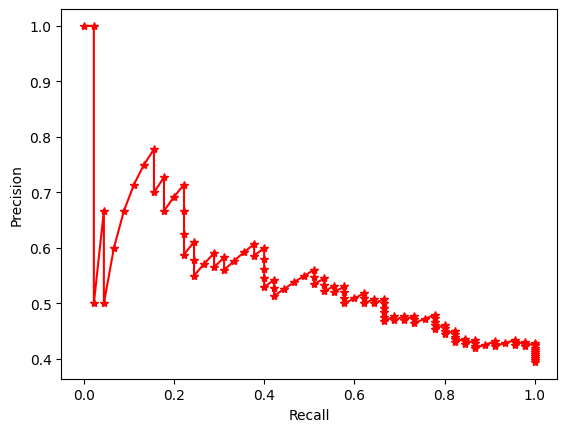

In [307]:
#plot a precision recall curve
scores=model.decision_function(X_test_pca)
inverted_scores=-scores
precision,recall,thresholds=precision_recall_curve(y_test,inverted_scores)

plt.plot(recall,precision,marker='*',color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [309]:
#for the isolation forest find out if our algorithm is overfitting by comparing the auc score of the training and testing data
y_pred_train=model.predict(X_train_pca)

#map the predictions -1 to 1 and 1 to 0
y_pred_train[y_pred_train==1]=0
y_pred_train[y_pred_train==-1]=1

#print new labels after mapping
print(f'New labels after mapping: {np.unique(y_pred_train)}')

#print classification report
print("Isolation Forest classification Report for train data:\n\n")
print(classification_report(y_train,y_pred_train))



New labels after mapping: [0 1]
Isolation Forest classification Report for train data:


              precision    recall  f1-score   support

           0       0.65      0.95      0.77       288
           1       0.60      0.13      0.21       167

    accuracy                           0.65       455
   macro avg       0.63      0.54      0.49       455
weighted avg       0.63      0.65      0.57       455



In [310]:
#classification report for the testing data
y_pred=model.predict(X_test_pca)

#map the predictions -1 to 1 and 1 to 0
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1

#print new labels after mapping
print(f'New labels after mapping: {np.unique(y_pred)}')

#print classification report
print("Isolation Forest classification Report on testing:\n\n")
print(classification_report(y_test,y_pred))


New labels after mapping: [0 1]
Isolation Forest classification Report on testing:


              precision    recall  f1-score   support

           0       0.63      0.97      0.76        69
           1       0.71      0.11      0.19        45

    accuracy                           0.63       114
   macro avg       0.67      0.54      0.48       114
weighted avg       0.66      0.63      0.54       114



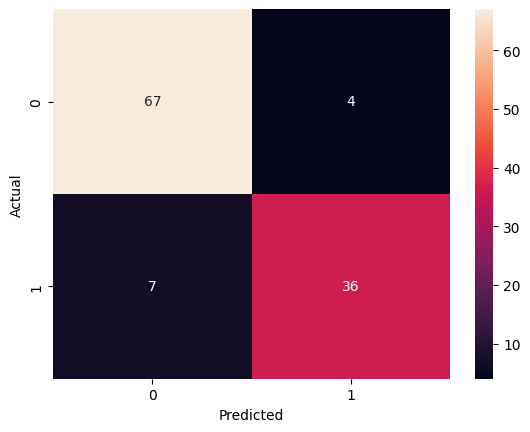

In [204]:
#plot a confusion matrix for the isolation forest
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [205]:
score=model.decision_function(X_test)

In [206]:
#I want to create a grid search cv for Local Outlier Factor
#parameters for grid search
param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'contamination': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
    'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

In [207]:
#initialize the model
model = LocalOutlierFactor(novelty=True, n_jobs=-1)

#set scoring metric to precision_recall_curve
scoring = 'precision'

#initialize the grid search
grid_search = GridSearchCV(estimator=model, scoring=scoring, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)


In [208]:
# #fit the grid search
# grid_search.fit(X_train, y_train)

In [209]:
# #best parameters
# print(f'Best parameters: {grid_search.best_params_}')

In [210]:
Lof=LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None, novelty=False, n_jobs=-1)
Lof.fit(X_train)
#predict the labels

y_pred_train=Lof.fit_predict(X_test)

# #print the unique values of the local outlier factor
# print(f'Local Outlier Factor: {np.unique(y_pred_train, return_counts=True)}')

#map the predictions -1 to 1 and 1 to 0
y_pred_train[y_pred_train==1]=0
y_pred_train[y_pred_train==-1]=1

#print new labels after mapping
Lof_score=Lof.negative_outlier_factor_
print(f'New labels after mapping: {np.unique(y_pred_train)}')

#print classification report
print("Local Outlier Factor classification Report:\n\n")
print(classification_report(y_test,y_pred_train))


New labels after mapping: [0 1]
Local Outlier Factor classification Report:


              precision    recall  f1-score   support

           0       0.63      0.93      0.75        71
           1       0.44      0.09      0.15        43

    accuracy                           0.61       114
   macro avg       0.54      0.51      0.45       114
weighted avg       0.56      0.61      0.53       114



In [211]:
#compute the anomaly score
Lof_score=-Lof.negative_outlier_factor_

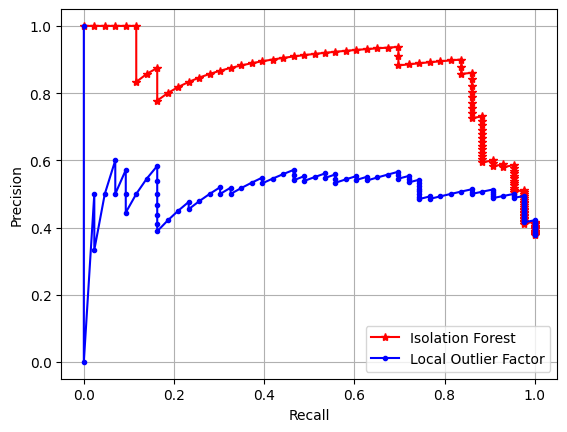

In [212]:
#plot precision and recall curve for isolation forest and local outlier factor
precision,recall,thresholds=precision_recall_curve(y_test,inverted_scores)
plt.plot(recall,precision,marker='*',color='red',label='Isolation Forest')
precision,recall,thresholds=precision_recall_curve(y_test,Lof_score)
plt.plot(recall,precision,marker='.',color='b',label='Local Outlier Factor')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

In [213]:
# #vusualize tree 0 of the isolation forest using plot_tree function
# from sklearn.tree import plot_tree
# plt.figure(figsize=(20,20))
# plot_tree(model.estimators_[50],filled=True,fontsize=10,feature_names=X.columns)
# plt.show()


In [214]:
X_train.shape

(455, 10)

In [215]:

# from sklearn.ensemble import IsolationForest
model_2=IsolationForest(random_state=42)
# Define the parameter grid
params = {'max_samples': [0.25, 0.5, 0.75, 1.0],
          'max_features': [0.25, 0.5, 0.75, 1.0],
          'n_estimators': [40, 60,80,100]}
# Create a custom scorer
scorer = make_scorer(average_precision_score)
# Create a GridSearchCV object
gs=GridSearchCV(model_2,params,scoring=scorer,n_jobs=-1,verbose=0)
res=gs.fit(X_train,y_train)
pd.DataFrame(res.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
46,0.418308,0.064321,0.022315,0.013367,0.75,1.0,80,"{'max_features': 0.75, 'max_samples': 1.0, 'n_...",0.302971,0.288854,0.341431,0.433281,0.311761,0.335660,0.051756,1
47,0.644922,0.236557,0.027031,0.005925,0.75,1.0,100,"{'max_features': 0.75, 'max_samples': 1.0, 'n_...",0.297340,0.282570,0.340575,0.442241,0.311761,0.334897,0.056989,2
45,0.342201,0.099715,0.011736,0.000410,0.75,1.0,60,"{'max_features': 0.75, 'max_samples': 1.0, 'n_...",0.302971,0.288854,0.335528,0.428329,0.311761,0.333489,0.049788,3
13,0.323251,0.083446,0.014674,0.006230,0.25,1.0,60,"{'max_features': 0.25, 'max_samples': 1.0, 'n_...",0.302971,0.274196,0.337370,0.443735,0.303197,0.332294,0.059206,4
62,0.460086,0.053408,0.013119,0.001754,1.0,1.0,80,"{'max_features': 1.0, 'max_samples': 1.0, 'n_e...",0.302971,0.271716,0.335528,0.439139,0.311761,0.332223,0.057232,5


In [216]:
mode=IsolationForest(random_state=1234, max_features=0.75, max_samples=0.25, n_estimators=60)
mode.fit(X_train)

IsolationForest(max_features=0.75, max_samples=0.25, n_estimators=60,
                random_state=1234)

In [217]:
#predict the labels
y_pred_train=mode.predict(X_test)

#map the predictions -1 to 1 and 1 to 0

y_pred_train[y_pred_train==1]=0
y_pred_train[y_pred_train==-1]=1

#print new labels after mapping
print(f'New labels after mapping: {np.unique(y_pred_train)}')

#print classification report
print(classification_report(y_test,y_pred_train))

New labels after mapping: [0 1]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        71
           1       0.92      0.84      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



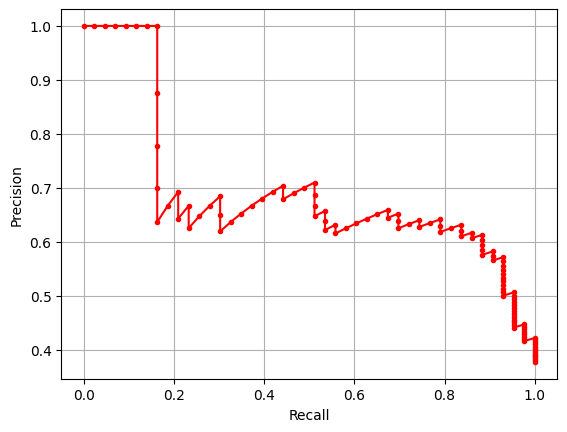

In [157]:
score=mode.decision_function(X_test)
inverted_score=-score
precision,recall,thresholds=precision_recall_curve(y_test,inverted_score)

plt.plot(recall,precision,marker='.',color='r',label='Isolation Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()